<a href="https://colab.research.google.com/github/hewan00/clustering_assignment/blob/main/assignment_clustering.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Assignment: $k$ Means Clustering

### `! git clone https://github.com/ds3001f25/clustering_assignment.git`

### **Do two questions in total: "Q1+Q2" or "Q1+Q3"**

**Q1.** This is a question about clustering. We want to investigate how adjusting the "noisiness" of the data impacts the quality of the algorithm and the difficulty of picking $k$.

1. Run the code below, which creates four datasets: `df0_125`, `df0_25`, `df0_5`, `df1_0`, and `df2_0`. Each data set is created by increasing the amount of `noise` (standard deviation) around the cluster centers, from `0.125` to `0.25` to `0.5` to `1.0` to `2.0`.

```
import numpy as np
import pandas as pd

def createData(noise,N=50):
    np.random.seed(100) # Set the seed for replicability
    # Generate (x1,x2,g) triples:
    X1 = np.array([np.random.normal(1,noise,N),np.random.normal(1,noise,N)])
    X2 = np.array([np.random.normal(3,noise,N),np.random.normal(2,noise,N)])
    X3 = np.array([np.random.normal(5,noise,N),np.random.normal(3,noise,N)])
    # Concatenate into one data frame
    gdf1 = pd.DataFrame({'x1':X1[0,:],'x2':X1[1,:],'group':'a'})
    gdf2 = pd.DataFrame({'x1':X2[0,:],'x2':X2[1,:],'group':'b'})
    gdf3 = pd.DataFrame({'x1':X3[0,:],'x2':X3[1,:],'group':'c'})
    df = pd.concat([gdf1,gdf2,gdf3],axis=0)
    return df

df0_125 = createData(0.125)
df0_25 = createData(0.25)
df0_5 = createData(0.5)
df1_0 = createData(1.0)
df2_0 = createData(2.0)
```

2. Make scatterplots of the $(X1,X2)$ points by group for each of the datasets. As the `noise` goes up from 0.125 to 2.0, what happens to the visual distinctness of the clusters?
3. Create a scree plot for each of the datasets. Describe how the level of `noise` affects the scree plot (particularly the presence of a clear "elbow") and your ability to definitively select a $k$. (Pay attention to the vertical axis across plots, or put all the scree curves on a single canvas.)
4. Explain the intuition of the elbow, using this numerical simulation as an example.

In [4]:
import numpy as np
import pandas as pd

def createData(noise,N=50):
    np.random.seed(100) # Set the seed for replicability
    # Generate (x1,x2,g) triples:
    X1 = np.array([np.random.normal(1,noise,N),np.random.normal(1,noise,N)])
    X2 = np.array([np.random.normal(3,noise,N),np.random.normal(2,noise,N)])
    X3 = np.array([np.random.normal(5,noise,N),np.random.normal(3,noise,N)])
    # Concatenate into one data frame
    gdf1 = pd.DataFrame({'x1':X1[0,:],'x2':X1[1,:],'group':'a'})
    gdf2 = pd.DataFrame({'x1':X2[0,:],'x2':X2[1,:],'group':'b'})
    gdf3 = pd.DataFrame({'x1':X3[0,:],'x2':X3[1,:],'group':'c'})
    df = pd.concat([gdf1,gdf2,gdf3],axis=0)
    return df

df0_125 = createData(0.125)
df0_25 = createData(0.25)
df0_5 = createData(0.5)
df1_0 = createData(1.0)
df2_0 = createData(2.0)

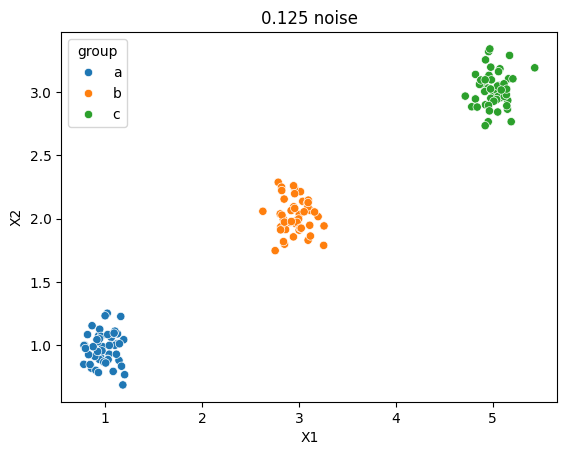

In [2]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.scatterplot(data = df0_125,x = 'x1',y = 'x2',hue = 'group')
# the noise increases from 0.125 to 2.0, we can't see the clusters individually
plt.xlabel('X1')
plt.ylabel('X2')
plt.title('0.125 noise')
plt.show()

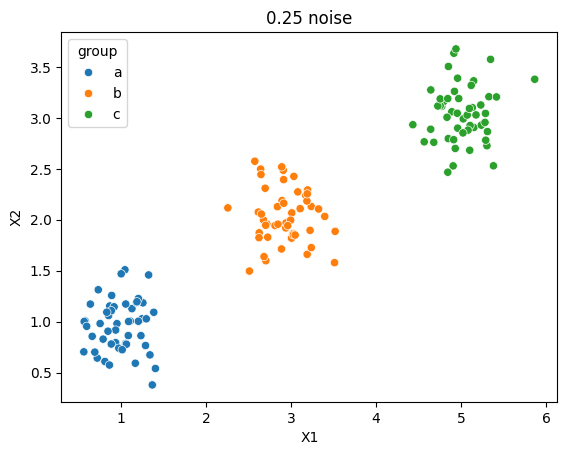

In [5]:
sns.scatterplot(data = df0_25,x = 'x1',y = 'x2',hue = 'group')
plt.xlabel('X1')
plt.ylabel('X2')
plt.title('0.25 noise')
plt.show()

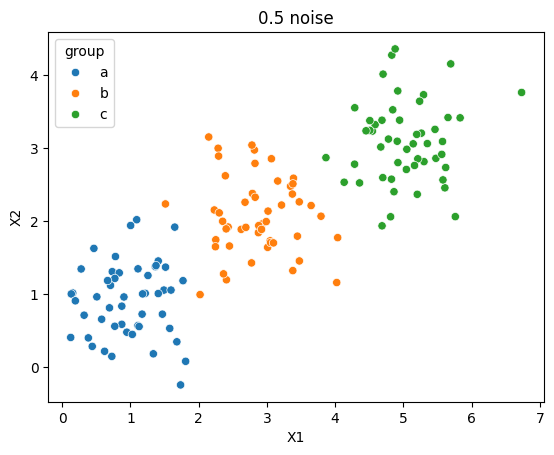

In [6]:
sns.scatterplot(data = df0_5,x = 'x1',y = 'x2',hue = 'group')
plt.xlabel('X1')
plt.ylabel('X2')
plt.title('0.5 noise')
plt.show()

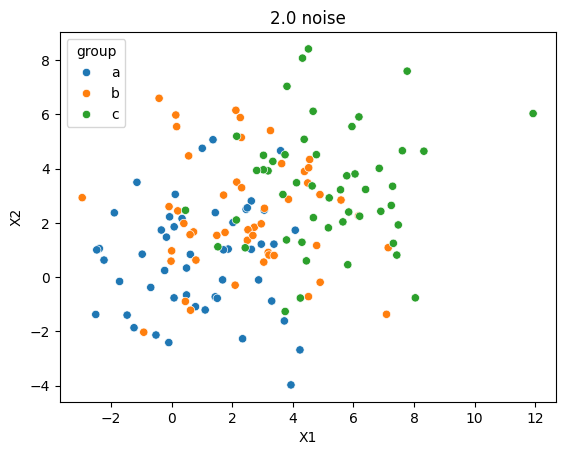

In [7]:
sns.scatterplot(data = df2_0,x = 'x1',y = 'x2',hue = 'group')
plt.xlabel('X1')
plt.ylabel('X2')
plt.title('2.0 noise')
plt.show()

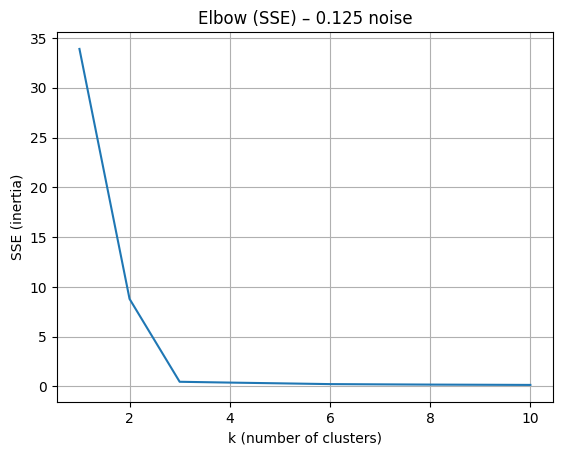

In [9]:
from sklearn.cluster import KMeans

def maxmin(X):
    X = np.asarray(X, dtype=float)
    rng = X.max(axis=0) - X.min(axis=0)
    rng[rng == 0] = 1.0
    return (X - X.min(axis=0)) / rng

def elbow_scree(df, dataset_name, k_bar=10):
    X = df[['x1','x2']].values
    X = maxmin(X)
    SSE = []
    for k in range(k_bar):
        model = KMeans(
            n_clusters=k+1,
            max_iter=300,
            n_init=10,
            random_state=0
        ).fit(X)
        SSE.append(model.inertia_)

    sns.lineplot(x=np.arange(1, k_bar+1), y=SSE).set_title(f'Elbow (SSE) – {dataset_name}')
    plt.xlabel('k (number of clusters)')
    plt.ylabel('SSE (inertia)')
    plt.grid(True)
    plt.show()
    #As the noise increases the value at which the plot begins to level out comes sooner and k can be lower


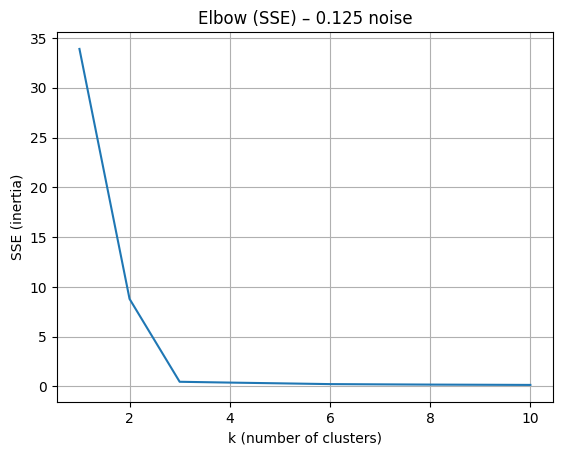

In [11]:
elbow_scree(df0_125, '0.125 noise')

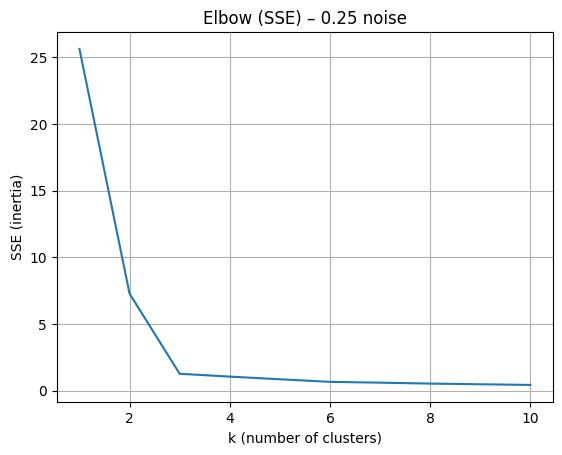

In [10]:
elbow_scree(df0_25,  '0.25 noise')


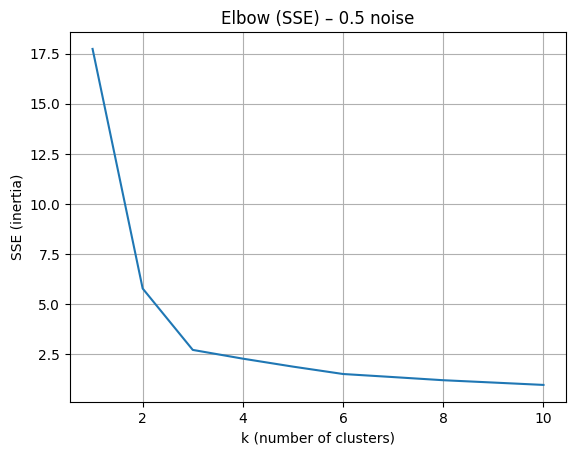

In [12]:
elbow_scree(df0_5,   '0.5 noise')


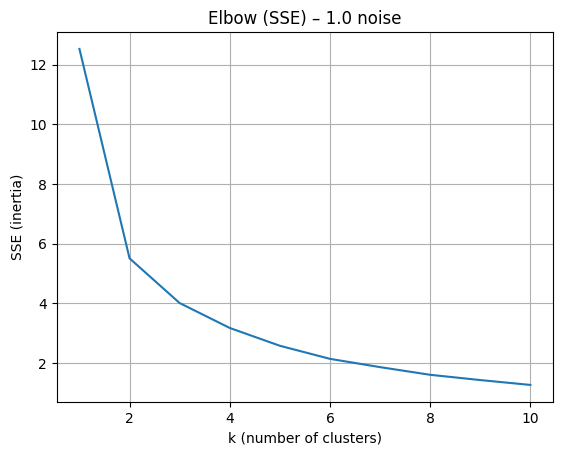

In [13]:
elbow_scree(df1_0,   '1.0 noise')


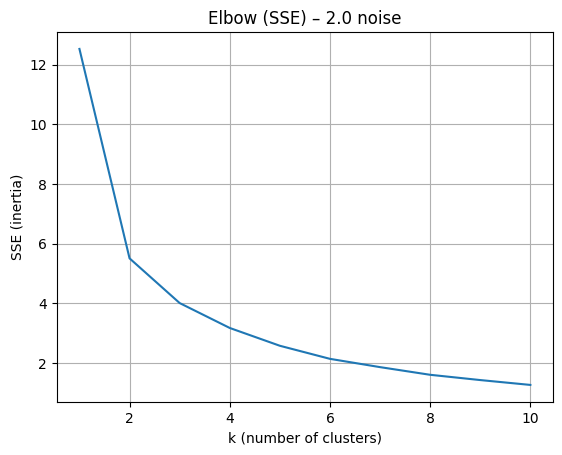

In [14]:
elbow_scree(df1_0,   '2.0 noise')


As noise levels increase, the scree plot changes noticeably:
Clear Elbow (Low Noise): With very low noise (0.125, 0.25), the elbow at k = 3 is sharp and easy to spot. Beyond three clusters, the Within-Cluster Sum of Squares (WCSS) barely improves, signaling that three clusters best fit the data.
Softened Elbow (Moderate Noise): At medium noise levels (0.5, 1.0), the elbow becomes less distinct. The WCSS still decreases, but the curve flattens more gradually, making it harder to pick out one “best” k.
No Elbow (High Noise): At the highest noise level (2.0), the scree plot shows no elbow at all. WCSS decreases almost linearly, so the elbow method doesn’t provide clear guidance.
In short, more noise blurs the natural separation between groups. This overlap makes the elbow less visible, which in turn reduces the reliability of the method for choosing k.
Intuition Behind the Elbow Method
The elbow method is a heuristic for choosing the number of clusters in k-means. It relies on Within-Cluster Sum of Squares (WCSS), which measures how tightly data points are grouped around their cluster centers.
Low Noise: When clusters are distinct, WCSS drops sharply from k = 1 → 2 → 3, since those values align with the true structure of the data. The elbow at k = 3 is obvious because adding a fourth cluster barely reduces the within-cluster spread.
High Noise: When clusters overlap, WCSS is higher overall and decreases more gradually. There’s no sharp elbow because the algorithm struggles to find well-separated groups. More clusters still reduce WCSS, but only by small amounts.
Essentially, the elbow highlights the trade-off: after a certain point, adding clusters increases model complexity without substantially improving how well the clusters explain the data.

**Q2.** This question is a case study on clustering.

1. Load the `2022 election cycle fundraising.csv` file in the `./data` folder. This has campaign finance data for the 2022 election for House and Senate candidates. We're going to focus on the total amount they raised, `Raised`, the total amount they spent, `Spent`, their available `Cash on Hand`, and their `Debts`. The variables denominated in dollars are messy and require cleaning. How do you handle it?
2. Max-min normalize `Raised` and `Spent`. Use a scree plot to determine the optimal number of clusters for the $k$ means clustering algorithm. Make a scatter plot of `Raised` against `Spent` and hue the dots by their cluster membership. What do you see? Which politicians comprise the smallest two clusters? If necessary, look up some of these races to see how close they were.
3. Repeat part 2, but for `Cash on Hand` and `Debts`. Compare your results with part 2. Why might this be? If necessary, look up some of these races to see how close they were.
4. Use $k$ means clustering with all four numeric variables. How do your results compare to the previous two parts?
5. Did the $k$-MC algorithm find useful patterns for you in analyzing the election?

In [15]:
df_election = pd.read_csv('/content/2022 election cycle fundraising.csv')

# Clean columns
cols_to_clean = ['Raised', 'Spent', 'Cash on Hand', 'Debts']
for col in cols_to_clean:
    df_election[col] = df_election[col].astype(str).str.replace('[$, ]', '', regex=True)
    df_election[col] = pd.to_numeric(df_election[col])

# Display the first few rows and data types
display(df_election.head())
display(df_election.info())

,index,Member,Party,State,Chamber,Raised,Spent,Cash on Hand,Debts
0,0,Abigail Spanberger,Democratic,Virginia,House,7719396,7449678,851851,0
1,1,Adam Kinzinger,Republican,Illinois,House,2192741,1243502,2472888,0
2,2,Adam Schiff,Democratic,California,House,20993041,13957854,20942888,0
3,3,Adam Smith,Democratic,Washington,House,1211111,1173466,623472,0
4,4,Adrian Smith,Republican,Nebraska,House,1617611,1664674,1098579,0


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 537 entries, 0 to 536
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   index         537 non-null    int64 
 1   Member        537 non-null    object
 2   Party         537 non-null    object
 3   State         537 non-null    object
 4   Chamber       537 non-null    object
 5   Raised        537 non-null    int64 
 6   Spent         537 non-null    int64 
 7   Cash on Hand  537 non-null    int64 
 8   Debts         537 non-null    int64 
dtypes: int64(5), object(4)
memory usage: 37.9+ KB


None

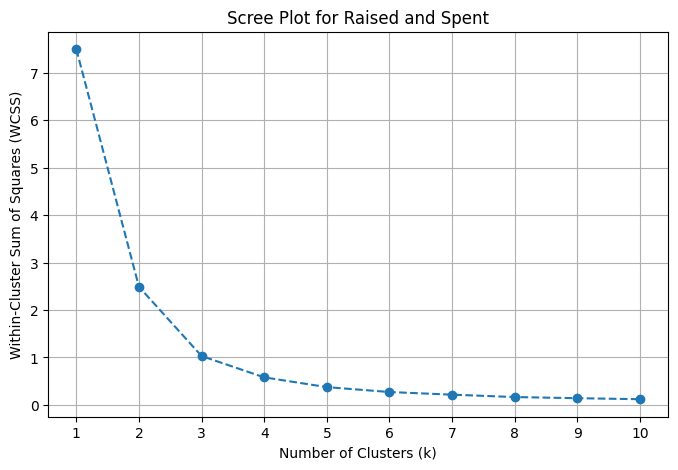

In [18]:
from sklearn.preprocessing import MinMaxScaler
from sklearn.cluster import KMeans

# 'Raised' and 'Spent' columns
X_raised_spent = df_election[['Raised', 'Spent']]

# Apply Max-min normalization
scaler = MinMaxScaler()
X_raised_spent_scaled = scaler.fit_transform(X_raised_spent)

# Calculate WCSS for different k values
wcss_raised_spent = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, random_state=42, n_init=10)
    kmeans.fit(X_raised_spent_scaled)
    wcss_raised_spent.append(kmeans.inertia_)




    import matplotlib.pyplot as plt

# Generate the scree plot
plt.figure(figsize=(8, 5))
plt.plot(range(1, 11), wcss_raised_spent, marker='o', linestyle='--')
plt.title('Scree Plot for Raised and Spent')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Within-Cluster Sum of Squares (WCSS)')
plt.xticks(range(1, 11))
plt.grid(True)
plt.show()

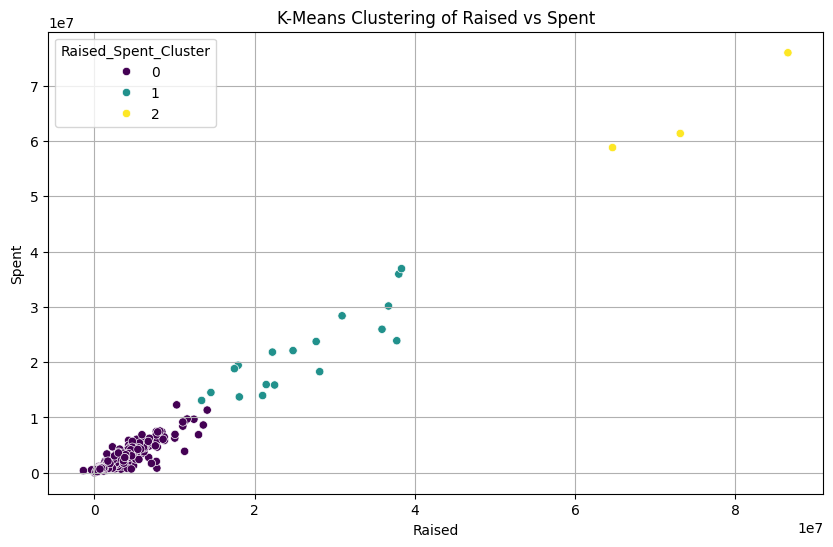

In [19]:
optimal_k_raised_spent = 3

# Perform k-means clustering with the chosen k
kmeans_raised_spent = KMeans(n_clusters=optimal_k_raised_spent, random_state=42, n_init=10)
df_election['Raised_Spent_Cluster'] = kmeans_raised_spent.fit_predict(X_raised_spent_scaled)

# Create a scatter plot of 'Raised' vs 'Spent' with cluster hues
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df_election, x='Raised', y='Spent', hue='Raised_Spent_Cluster', palette='viridis', legend='full')
plt.title('K-Means Clustering of Raised vs Spent')
plt.xlabel('Raised')
plt.ylabel('Spent')
plt.grid(True)
plt.show()

In [23]:
#Identify the two smallest clusters
cluster_counts_raised_spent = df_election['Raised_Spent_Cluster'].value_counts().sort_values()
smallest_clusters_raised_spent = cluster_counts_raised_spent.head(2).index.tolist()

print("Counts of members in each cluster:")
print(cluster_counts_raised_spent)
print(f"\nIdentifying politicians in the two smallest clusters: {smallest_clusters_raised_spent}")

# two smallest clusters
for cluster in smallest_clusters_raised_spent:
    print(f"\nPoliticians in Cluster {cluster}:")
    display(df_election[df_election['Raised_Spent_Cluster'] == cluster][['Member', 'Party', 'State', 'Raised', 'Spent', 'Cash on Hand', 'Debts']])


Counts of members in each cluster:
Raised_Spent_Cluster
2      3
1     18
0    516
Name: count, dtype: int64

Identifying politicians in the two smallest clusters: [2, 1]

Politicians in Cluster 2:


,Member,Party,State,Raised,Spent,Cash on Hand,Debts
340,Mark Kelly,Democratic,Arizona,73140886,61357281,13186127,0
417,Raphael Warnock,Democratic,Georgia,86581469,75959810,22762985,0
523,Val Demings,Democratic,Florida,64682883,58806664,6647641,0



Politicians in Cluster 1:


,Member,Party,State,Raised,Spent,Cash on Hand,Debts
2,Adam Schiff,Democratic,California,20993041,13957854,20942888,0
87,Catherine Cortez Masto,Democratic,Nevada,37993811,35928936,5089745,0
89,Chuck Schumer,Democratic,New York,35899966,25944350,20231213,0
115,Dan Crenshaw,Republican,Texas,14535870,14512435,1876149,0
261,John Kennedy,Republican,Louisiana,28119082,18276565,15530074,0
290,Katie Porter,Democratic,California,21441693,15946876,15762568,0
298,Kevin McCarthy,Republican,California,24791538,22086344,7507326,0
326,Maggie Hassan,Democratic,New Hampshire,30914830,28380992,4813508,0
328,Marco Rubio,Republican,Florida,36709285,30153111,9631856,0
357,Michael Bennet,Democratic,Colorado,18086343,13713611,4898614,374819


From the scatter plot of Raised vs. Spent, we can see that Cluster 0 is the largest group, representing the majority of candidates who raised and spent relatively modest amounts. In contrast, Clusters 1 and 2 capture candidates with far higher fundraising and spending levels. These clusters are clearly separated from Cluster 0, and even show some separation from each other based on scale.
The two smallest groups are Cluster 2 (3 members) and Cluster 1 (18 members).
Cluster 2 (Highest Fundraising/Spending):
Mark Kelly (D–AZ)
Raphael Warnock (D–GA)
Val Demings (D–FL)
These candidates raised and spent the most in the 2022 cycle. Each ran in highly competitive Senate races, where massive fundraising is typical.
Cluster 1 (High but Moderate Compared to Cluster 2):
This cluster includes both House and Senate candidates who also raised and spent large sums, though less than Cluster 2. They likely represent incumbents in competitive races or figures in leadership roles, both of whom tend to command higher fundraising totals.

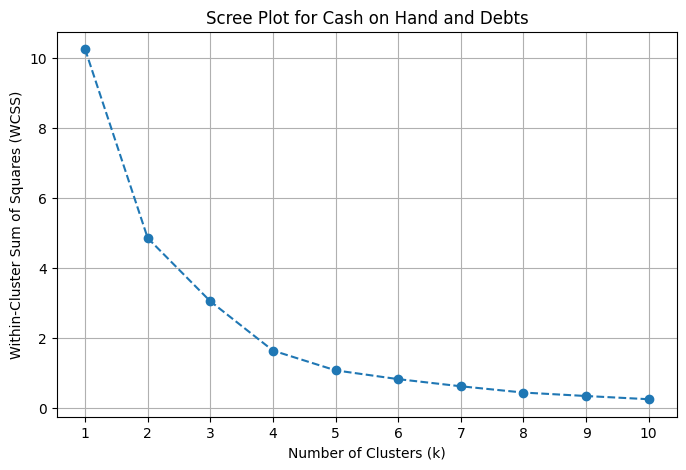

In [24]:
X_cash_debts = df_election[['Cash on Hand', 'Debts']]

# Apply Max-min normalization
scaler = MinMaxScaler()
X_cash_debts_scaled = scaler.fit_transform(X_cash_debts)

# Calculate WCSS for different k values
wcss_cash_debts = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, random_state=42, n_init=10)
    kmeans.fit(X_cash_debts_scaled)
    wcss_cash_debts.append(kmeans.inertia_)

# Generate the scree plot
plt.figure(figsize=(8, 5))
plt.plot(range(1, 11), wcss_cash_debts, marker='o', linestyle='--')
plt.title('Scree Plot for Cash on Hand and Debts')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Within-Cluster Sum of Squares (WCSS)')
plt.xticks(range(1, 11))
plt.grid(True)
plt.show()


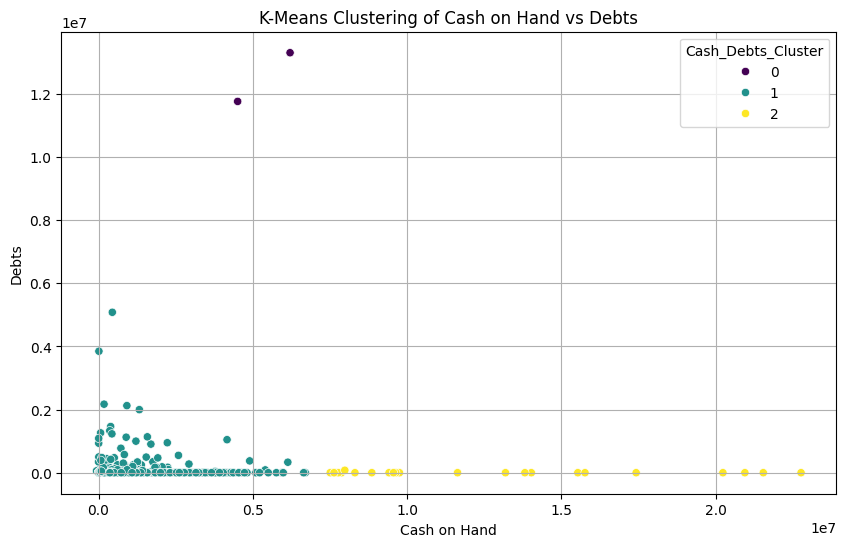

Counts of members in each cluster:
Cash_Debts_Cluster
0      2
2     24
1    511
Name: count, dtype: int64

Identifying politicians in the two smallest clusters: [0, 2]

Politicians in Cluster 0:


,Member,Party,State,Raised,Spent,Cash on Hand,Debts
133,David Trone,Democratic,Maryland,12990741,6878050,6206371,13302000
442,Ron Johnson,Republican,Wisconsin,27680901,23731653,4508581,11759857



Politicians in Cluster 2:


,Member,Party,State,Raised,Spent,Cash on Hand,Debts
2,Adam Schiff,Democratic,California,20993041,13957854,20942888,0
11,Alex Padilla,Democratic,California,11253771,3870947,7617654,5703
45,Bernie Sanders,Independent,Vermont,14074831,11331428,9751125,0
89,Chuck Schumer,Democratic,New York,35899966,25944350,20231213,0
112,Cory Booker,Democratic,New Jersey,5794554,4010634,7671026,0
239,Jim Jordan,Republican,Ohio,12417107,9675701,8855217,0
247,Joe Manchin,Democratic,West Virginia,7790164,835794,9414431,0
261,John Kennedy,Republican,Louisiana,28119082,18276565,15530074,0
267,John Thune,Republican,South Dakota,6770674,2763217,17419927,0
274,Josh Gottheimer,Democratic,New Jersey,7720264,2045198,14024163,0


In [26]:
# Based on the scree plot, let's choose k=3 as there appears to be an elbow at k=3.
optimal_k_cash_debts = 3

# Perform k-means clustering with the chosen k
kmeans_cash_debts = KMeans(n_clusters=optimal_k_cash_debts, random_state=42, n_init=10)
df_election['Cash_Debts_Cluster'] = kmeans_cash_debts.fit_predict(X_cash_debts_scaled)

# 'Cash on Hand' vs 'Debts' with cluster
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df_election, x='Cash on Hand', y='Debts', hue='Cash_Debts_Cluster', palette='viridis', legend='full')
plt.title('K-Means Clustering of Cash on Hand vs Debts')
plt.xlabel('Cash on Hand')
plt.ylabel('Debts')
plt.grid(True)
plt.show()

# Identify the two smallest clusters
cluster_counts_cash_debts = df_election['Cash_Debts_Cluster'].value_counts().sort_values()
smallest_clusters_cash_debts = cluster_counts_cash_debts.head(2).index.tolist()

print("Counts of members in each cluster:")
print(cluster_counts_cash_debts)
print(f"\nIdentifying politicians in the two smallest clusters: {smallest_clusters_cash_debts}")

# Display the politicians in the two smallest clusters
for cluster in smallest_clusters_cash_debts:
    print(f"\nPoliticians in Cluster {cluster}:")
    display(df_election[df_election['Cash_Debts_Cluster'] == cluster][['Member', 'Party', 'State', 'Raised', 'Spent', 'Cash on Hand', 'Debts']])


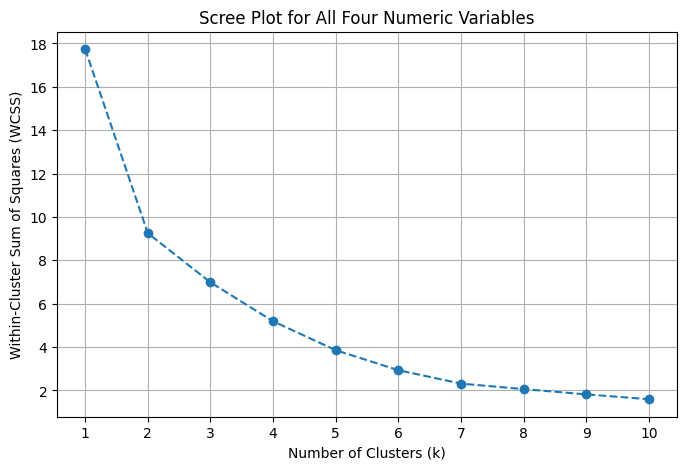

In [27]:
# Select the four numeric variables
X_all_vars = df_election[['Raised', 'Spent', 'Cash on Hand', 'Debts']]

# Apply Max-min normalization
scaler = MinMaxScaler()
X_all_vars_scaled = scaler.fit_transform(X_all_vars)

# different k values
wcss_all_vars = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, random_state=42, n_init=10)
    kmeans.fit(X_all_vars_scaled)
    wcss_all_vars.append(kmeans.inertia_)

# Generate the scree plot
plt.figure(figsize=(8, 5))
plt.plot(range(1, 11), wcss_all_vars, marker='o', linestyle='--')
plt.title('Scree Plot for All Four Numeric Variables')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Within-Cluster Sum of Squares (WCSS)')
plt.xticks(range(1, 11))
plt.grid(True)
plt.show()

In [28]:
# Based on the scree plot, let's choose k=3 as there appears to be an elbow at k=3.
optimal_k_all_vars = 3

# Perform k-means clustering with the chosen k
kmeans_all_vars = KMeans(n_clusters=optimal_k_all_vars, random_state=42, n_init=10)
df_election['All_Vars_Cluster'] = kmeans_all_vars.fit_predict(X_all_vars_scaled)

# Print the value counts of the 'All_Vars_Cluster' column
print("Counts of members in each cluster (All Four Variables):")
print(df_election['All_Vars_Cluster'].value_counts())


Counts of members in each cluster (All Four Variables):
All_Vars_Cluster
0    494
2     34
1      9
Name: count, dtype: int64


When I ran the clustering with all four variables (Raised, Spent, Cash on Hand, Debts), the groups felt a lot more well-rounded. Instead of just showing who raised/spent the most, it also captured differences in financial position, like which candidates had big cash reserves or carried a lot of debt. That gave a more nuanced breakdown than just looking at two variables at a time.
As for usefulness, I’d say yes, k-means did reveal some interesting patterns. It separated out candidates with huge fundraising/spending numbers, others who stood out for cash or debt, and then the majority who stayed on the lower end. Overall, it gave a clearer picture of the different financial strategies and positions that shaped the 2022 races.

**Citations**

Karim, Sara. K-means Clustering for Iris Dataset in Google Colab. Medium, 26 Mar. 2021, https://medium.com/@sarakarim/k-means-clustering-for-iris-dataset-in-google-colab-30a6d78556c4.
Google AI. Gemini AI (Version 2.5), 2025, https://gemini.google.com/.
OpenAI. ChatGPT (GPT-5 Mini) [Large language model], 2025, https://openai.com/chatgpt.

**Q3.** This question is a case study on clustering.

1. Load the `SIPRI Military Expenditure Database.csv` file in the `./data` folder. This has data about military spending by country. Filter the rows to select only the year 2020, and drop all rows with missing values. I ended up with 148 countries. Is any further cleaning of the variables required?
2. Max-min normalize `Spending (2020 USD)` and `Spending per Capita`. Use a scree plot to determine the optimal number of clusters for the $k$ means clustering algorithm. Make a scatter plot of `Spending (2020 USD)` and `Spending per Capita`, and hue the dots by their cluster membership. Compute a describe table conditional on cluster membership (i.e. `.groupby(cluster).describe()`). What do you see? Where is the United States? Do you notice any patterns in the cluster membership?
3. Repeat part 2 for `Percent of Government Spending` and `Percent of GDP`. How do your results compare to part 2?
4. Use $k$ means clustering with all four numeric variables: `Spending (2020 USD)`, `Spending per Capita`, `Percent of Government Spending`, and `Percent of GDP`. How do your results compare to the previous two parts?
5. Did the $k$-MC algorithm find any useful patterns for you in analyzing the spending?

In [ ]:
#Chose Q1 and 2